In [419]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style as style 
style.use('fivethirtyeight')
style.use('bmh')

pd.set_option('display.max_colwidth', None)

plt.rcParams['figure.figsize'] = [10, 10]

# Part 1: Exploratory Data Analysis

In [420]:
#Load logins data
df = pd.read_json('logins.json')

In [421]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [422]:
df.describe()

/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [423]:
#Data appears to be in datetime format already
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [424]:
#Create additional column showing number of login count that can be used to aggreggate when grouping by intervals
df['login_count'] = 1

In [425]:
#Create new dataframe by grouping by 15 minute intervals and summing login_count

df_time = df.resample('15min',on = 'login_time').sum()

In [426]:
df_time

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


Text(0.5, 1.0, '# of Logins over Time ')

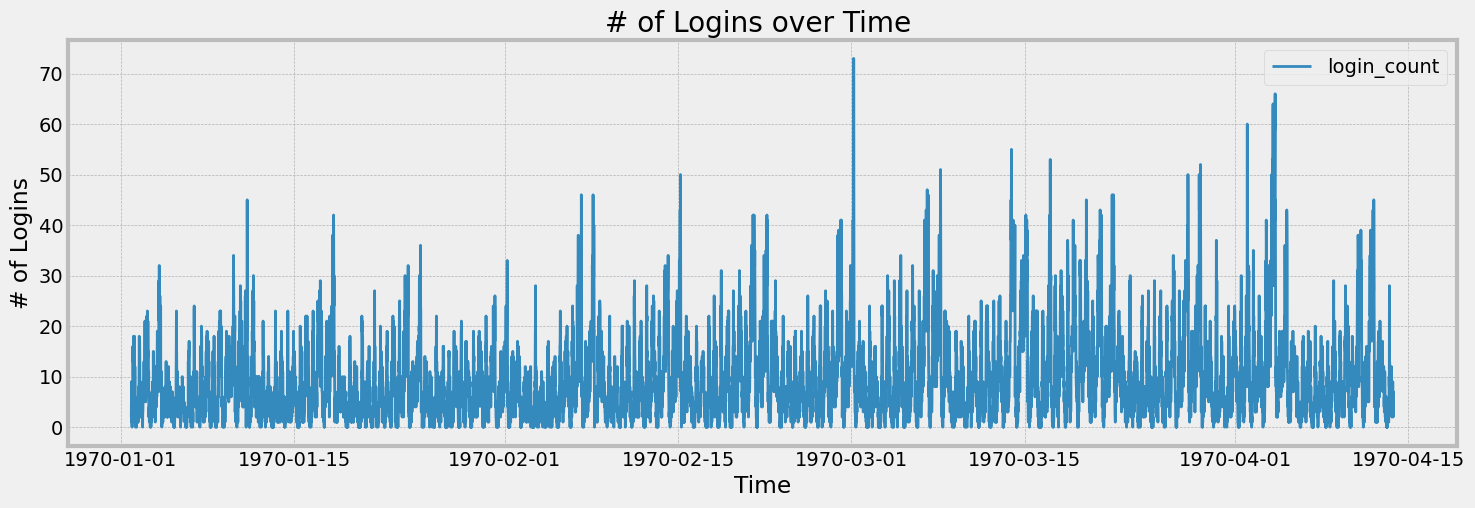

In [427]:
#Plot the 15-min grouped logins 

fig, ax = plt.subplots(figsize = (15,5))
_ = sns.lineplot(df_time)
plt.xlabel('Time')
plt.ylabel('# of Logins')
plt.tight_layout()
plt.title('# of Logins over Time ')


#Shows timeseries with some trends but too much data and noise to extract insights

In [428]:
df_time.describe()

,login_count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [429]:
df_time.isnull().sum()

login_count    0
dtype: int64

In [430]:
#Create additional column to break down into time of day

df_time['hour'] = df_time.index.hour

In [431]:
#Create dictionary of times of day to map login times onto
time_of_day = ['midnight','morning','afternoon','night']

In [432]:
df_time

,login_count,hour
login_time,,
1970-01-01 20:00:00,2,20
1970-01-01 20:15:00,6,20
1970-01-01 20:30:00,9,20
1970-01-01 20:45:00,7,20
1970-01-01 21:00:00,1,21
...,...,...
1970-04-13 17:45:00,5,17
1970-04-13 18:00:00,5,18
1970-04-13 18:15:00,2,18


In [433]:
#Create buckets of time of day: Midnight = 0000 - 0559 hours ; Morning = 0600 - 1159 hours; Afternoon = 1200 - 1759 hours
# Night = 1800 - 2359 hours

df_time['time_of_day'] = pd.cut(df_time.hour,bins = [0,5,11,17,23],labels = time_of_day)

In [434]:
df_time['time_of_day']

login_time
1970-01-01 20:00:00        night
1970-01-01 20:15:00        night
1970-01-01 20:30:00        night
1970-01-01 20:45:00        night
1970-01-01 21:00:00        night
                         ...    
1970-04-13 17:45:00    afternoon
1970-04-13 18:00:00        night
1970-04-13 18:15:00        night
1970-04-13 18:30:00        night
1970-04-13 18:45:00        night
Freq: 15T, Name: time_of_day, Length: 9788, dtype: category
Categories (4, object): ['midnight' < 'morning' < 'afternoon' < 'night']

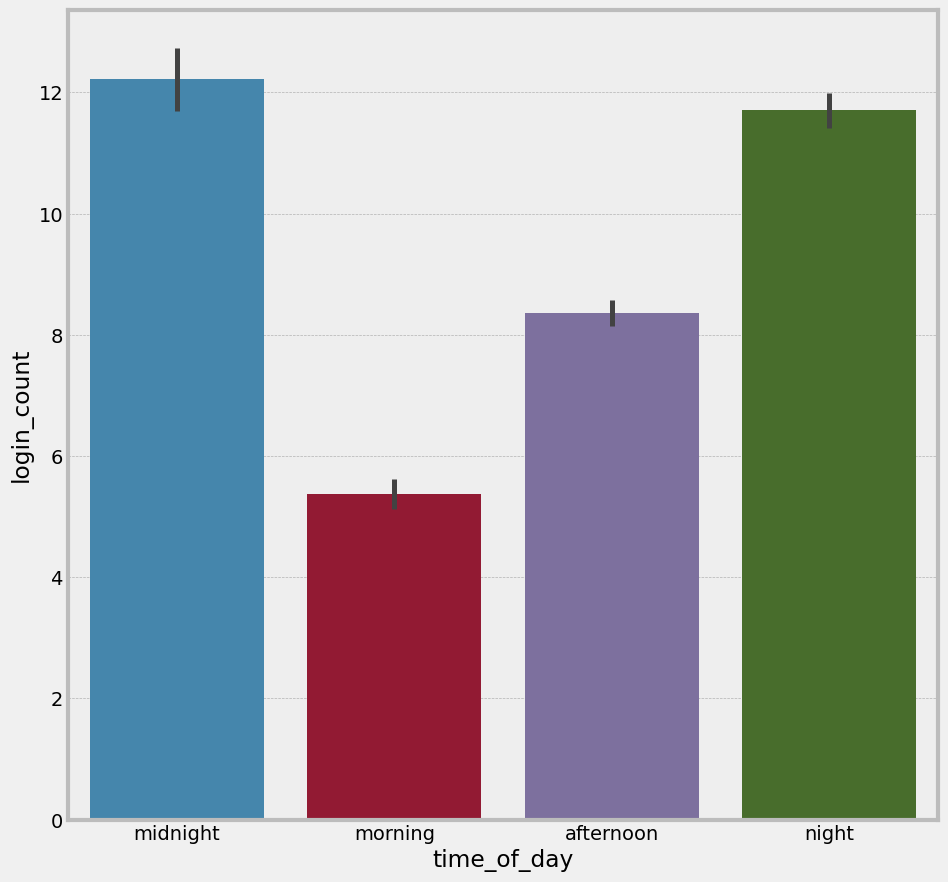

In [435]:
#Create barplot showing logins by time of day
_ = sns.barplot(x = df_time.time_of_day, y = df_time.login_count)

#Night and midnight seem to be most popular while morning by far has the fewest logins 

In [436]:
#Create new column showing day of the week 

df_time['dayofweek'] = df_time.index.dayofweek

In [437]:
#Create new column to show name of day of the week 

days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_time['day_name'] = df_time['dayofweek'].map(days)
df_time

,login_count,hour,time_of_day,dayofweek,day_name
login_time,,,,,
1970-01-01 20:00:00,2,20,night,3,Thursday
1970-01-01 20:15:00,6,20,night,3,Thursday
1970-01-01 20:30:00,9,20,night,3,Thursday
1970-01-01 20:45:00,7,20,night,3,Thursday
1970-01-01 21:00:00,1,21,night,3,Thursday
...,...,...,...,...,...
1970-04-13 17:45:00,5,17,afternoon,0,Monday
1970-04-13 18:00:00,5,18,night,0,Monday
1970-04-13 18:15:00,2,18,night,0,Monday


In [438]:
#Create new column to show if day is weekday or weekend 

def get_weekdays(val):
        if val in range(0,5):
            return 'Weekday'
        elif val in range (5,7):
            return 'Weekend'

                                  
df_time['day_type'] = df_time['dayofweek'].apply(get_weekdays)
df_time['day_type'].value_counts()

Weekday    6908
Weekend    2880
Name: day_type, dtype: int64

Text(0.5, 1.0, '# of Logins by Day of the Week ')

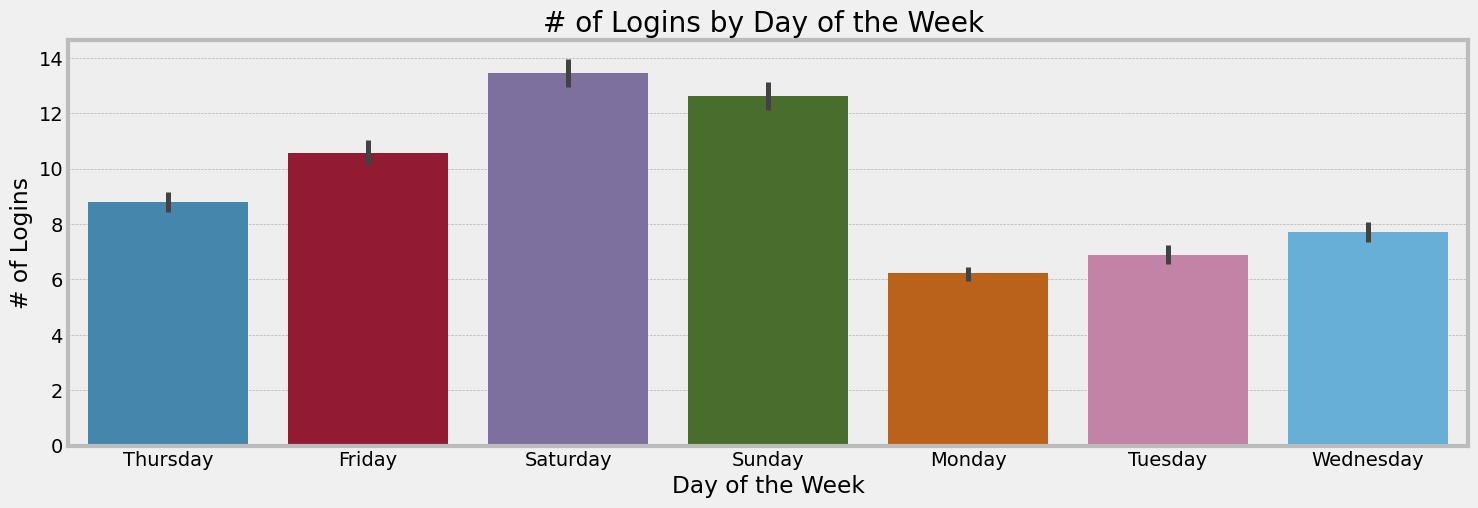

In [439]:
#Figure shows the number of logins by day of the week

fig, ax = plt.subplots(figsize = (15,5))
_ = sns.barplot(x = 'day_name', y = 'login_count', data = df_time)
plt.xlabel('Day of the Week')
plt.ylabel('# of Logins')
plt.tight_layout()
plt.title('# of Logins by Day of the Week ')



#Shows weekends (Fridays - Sunday) as most popular times with Monday - Wednesday being much less popular

Text(0.5, 1.0, '# of Logins by Hour of the Day ')

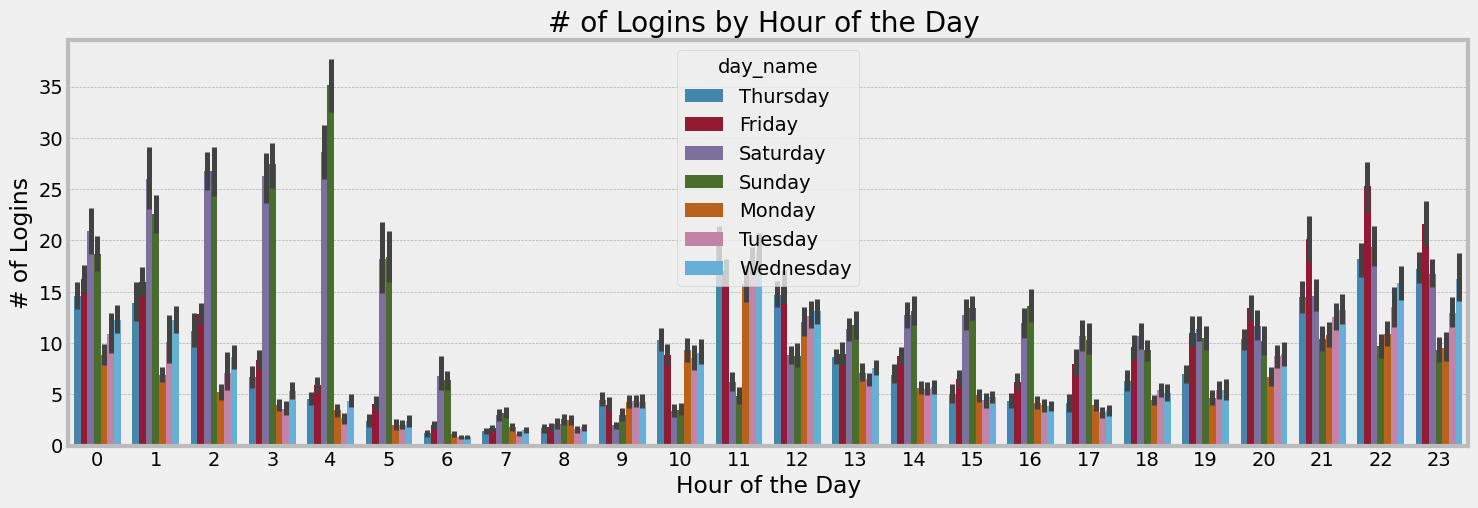

In [440]:
#Chart shows number of logins per hour of the day and shows day of the week as well
fig, ax = plt.subplots(figsize = (15,5))
_ = sns.barplot(x = 'hour', y = 'login_count', hue = 'day_name', data = df_time)
plt.xlabel('Hour of the Day')
plt.ylabel('# of Logins')
plt.tight_layout()
plt.title('# of Logins by Hour of the Day ')



In [441]:
#Create new dataframe by grouping by day and summing login_count

df_day = df.resample('D',on = 'login_time').sum()

Text(0.5, 1.0, '# of Logins over Time ')

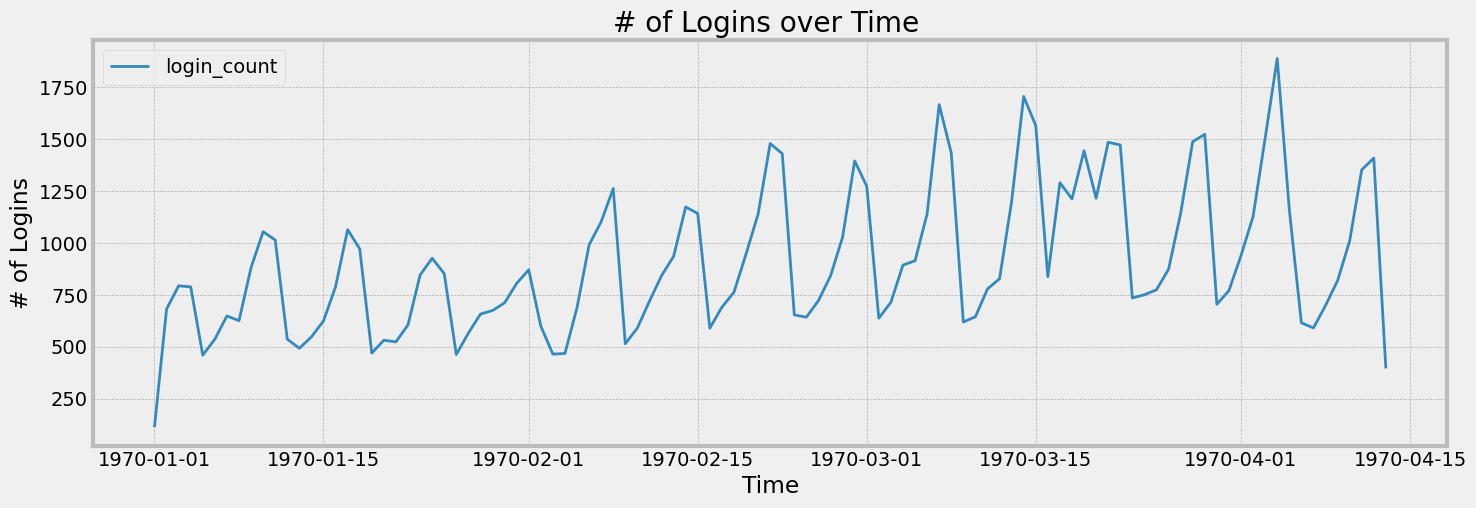

In [442]:
fig, ax = plt.subplots(figsize = (15,5))
_ = sns.lineplot(df_day)
plt.xlabel('Time')
plt.ylabel('# of Logins')
plt.tight_layout()
plt.title('# of Logins over Time ')

In [443]:
#Create new dataframe by grouping by day and summing login_count

df_dow = df.resample('W',on = 'login_time').sum()

In [444]:
df_dow

,login_count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744
1970-02-08,5572
1970-02-15,5915
1970-02-22,7035
1970-03-01,6554


Text(0.5, 1.0, '# of Logins over Time ')

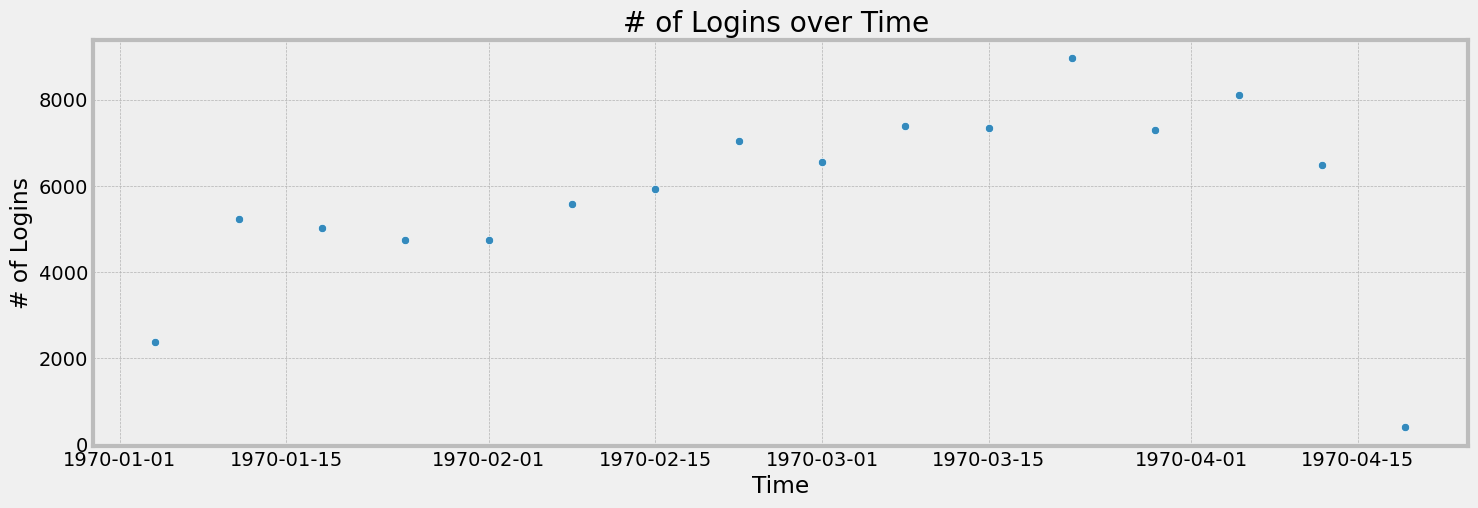

In [445]:
fig, ax = plt.subplots(figsize = (15,5))
_ = sns.scatterplot(df_dow['login_count'])
plt.xlabel('Time')
plt.ylabel('# of Logins')
plt.tight_layout()
plt.title('# of Logins over Time ')

# Part 2. Experiment and Metric Design 

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?


Before choosing this metric, I would want further clarification on what is the reason (business issue) that the city managers want to run this experiment. Without further information, I am assuming they ultimately want to reduce the wait time for customers in each city by increasing the supply of drivers available especially during peak times in each city. As a result, I would use average wait time for customers as the key metric because this is ultimately the metric that they are hoping to change by conducting this experiment. Simply having drivers go to both cities does not drive business in and of itself without linking to downstream metrics ie. wait time. 


A simpler metric that I considered was to track the mean number of drivers that cross the bridge and see if there was a significant change during the experiment. However, this metric is very dependent on the proportion of driver partners to the whole population using these bridges. For example, if the total number of people using the bridge is much, much larger than the number of driver partners, then even if there were many drivers using the bridge during the experiment, the total mean drivers would not change a signficant amount. 

Alternatively, we can look at just the mean of driver partners using the bridge using the reimbursements. However, this would require the assumption that we were able to calculate the mean of driver partners using the bridge prior to the experiment. If possible, this could serve as a simpler, upstream metric to track. However, the mean wait time in each city is a better business-oriented metric for the key measure of success. 

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

I am making an assumption that there is a way to track the wait time for each customer (time between ride called on app and ride arriving to pick up customer). If so, I would calculate the average wait time for the peak time periods of the day  (6 am to 6 pm in Metropolis, 6pm to 6am in Gotham) during weekdays in each city prior to the experiment. Then, I would conduct the experiment for approximately 4 weeks. I would then calculate the same average wait times for the period of the experiment. 


b) what statistical test(s) you will conduct to verify the significance of the observation

I would use a left-tailed z-test to verify the significance. Assuming I have the data, the mean over large period of time prior to the experiment can be assumed to be the population mean. I would then run a z test comparing:


    (average wait time in Metropolis from 6am - 6pm on weekdays PRIOR to the experiment) vs. 

    (average wait time in Metropolis from 6am - 6pm on weekdays DURING the experiment) 

to see if the mean wait time has reduced in a signficant manner (alpha = 0.05 as the signficance level). 




Similarly, I would use another left-tailed z-test to compare the wait times in Gotham. 



    (average wait time in Gotham from 6pm - 6am on weekdays PRIOR to the experiment) vs. 

    (average wait time in Gotham from 6pm - 6am on weekdays DURING the experiment) 


to see if the mean wait time has reduced in a signficant manner (alpha = 0.05 as the signficance level). 




c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

After conducting the experiment and the z tests, I would compare the test value and see if it was greater or less than the p value. If the test value is greater than the p value (> 0.05) then I would not be able to reject the null hypothesis and conclude that there was no signficant change in wait times during the experiment. However, if test value < 0.05 then I would reject the null hypothesis and conclude that the average wait time was in fact significantly reduced during the experiment. 

If both tests (one for each city) reject the null hypothesis, then I would conclude that the expeeriment did in fact make a notable change in wait times and recommend that the cities carry on this experiment for a longer period and re-evaluate it in ~ 6 months. 


#   Part 3. Predictive Modeling

In [446]:
#Read in json file into dataframe rr (rider retention)

rr = pd.read_json('ultimate_data_challenge.json')

In [447]:
rr

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [448]:
rr.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [449]:
rr.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [450]:
#Convert date columns from object types into date type
rr['last_trip_date'] = pd.to_datetime(rr['last_trip_date'])
rr['signup_date'] = pd.to_datetime(rr['signup_date'])

In [451]:
#Understand time range of last trip date
rr['last_trip_date'].sort_values()[-5:]

45126   2014-07-01
38651   2014-07-01
14473   2014-07-01
22735   2014-07-01
45357   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [452]:
#There are some null values in dataset 
rr.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [453]:

print(f"avg_rating_of_driver:  median = {rr['avg_rating_of_driver'].median()} mean = {rr['avg_rating_of_driver'].mean()}")
#Sizeable difference between mean and median, likely mean depressed by very low values; will impute null
# values with median 

avg_rating_of_driver:  median = 4.9 mean = 4.601559291274655


In [454]:
print(f"avg_rating_by_driver:  median = {rr['avg_rating_by_driver'].median()} mean = {rr['avg_rating_by_driver'].mean()}")

avg_rating_by_driver:  median = 5.0 mean = 4.77815819594771


In [455]:
#Impute null avg ratings of driver and by driver with median values 
rr['avg_rating_of_driver'].fillna(rr['avg_rating_of_driver'].median(), inplace=True)
rr['avg_rating_by_driver'].fillna(rr['avg_rating_by_driver'].median(), inplace=True)

In [456]:
#Small number of null values with no phone, will forward fill to impute these
rr['phone'].fillna(method = 'ffill',inplace = True)

In [457]:
#Verify no null values left
rr.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [458]:
#Check for duplicate rows ; see small number of duplicates that can be dropped
rr.duplicated().value_counts()

False    49991
True         9
dtype: int64

In [459]:
#Drop duplicate rows
rr.drop_duplicates(inplace = True)

In [460]:
#Create list of numeric features for easier plotting

num_cols = [col for col in rr.columns if rr[col].dtype in ['float64','int64']]
num_cols

['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

In [461]:
#Define function to help remove outliers from data (outside of 1.5* IQR)

def removeOutliers(data, col):
    Q1 = np.quantile(data[col], 0.25)
    Q3 = np.quantile(data[col], 0.75)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    #outlier_free_list = [x for x in data[col] if (
        #(x > lower_range) & (x < upper_range))]
    #filtered_data = data.loc[data[col].isin(outlier_free_list)]
    
    
    filter = (data[col] >= lower_range) & (data[col] <= upper_range)
    filtered_data = data.loc[filter]
    
    
    return filtered_data

surge_fix = removeOutliers(rr,'avg_surge')
surge_fix.shape

IQR value for column avg_surge is: 0.050000000000000044


(41581, 12)

In [462]:
num_cols

['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

In [463]:
rr.shape

(49991, 12)

In [464]:
#Define helper function that goes through numeric columns and removes outliers

def filtered_data(df,columns):
    df_new = df
    for col in columns:
        df_new = removeOutliers(df,col)
    return df_new

    

In [465]:
rr_no_outlier = filtered_data(rr,num_cols)

IQR value for column trips_in_first_30_days is: 3.0
IQR value for column avg_rating_of_driver is: 0.5
IQR value for column avg_surge is: 0.050000000000000044
IQR value for column surge_pct is: 8.6
IQR value for column weekday_pct is: 66.7
IQR value for column avg_dist is: 4.5200000000000005
IQR value for column avg_rating_by_driver is: 0.2999999999999998


In [466]:
rr_no_outlier.shape

(46041, 12)

In [467]:
#Create target column 'active_user' that labels each customer as 'Active' if their last trip was within the 
#last 30 days, if not label them 'Inactive'

from datetime import date

def active_finder(date, start = date(2014,6,1), end = date(2014,7,1)):
    if start <= date <= end:
        return 'Active'
    elif  date < start:
        return 'Inactive'
    else:
        return 'Error'

rr['active_user'] = rr['last_trip_date'].apply(active_finder)
rr

/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/3635190109.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if start <= date <= end:
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/3635190109.py:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  elif  date < start:


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,Active
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,Inactive
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,Inactive
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,Active
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,Active
49996,Astapor,1,2014-01-24,4.9,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,Inactive
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,Inactive
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,Inactive


In [468]:
rr['phone'].value_counts()

iPhone     34845
Android    15146
Name: phone, dtype: int64

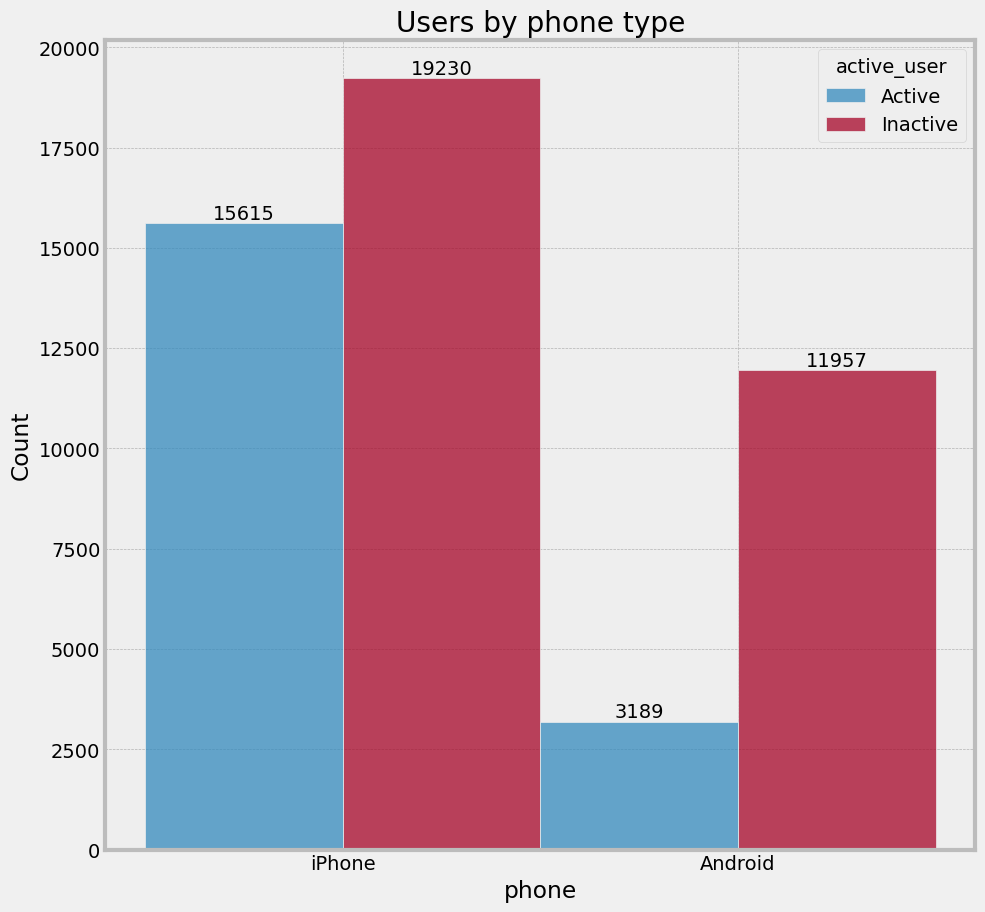

In [479]:
#Create stacked barplot showing active users by phone type
ax=sns.histplot(x= rr.phone, hue = rr['active_user'], multiple = 'dodge')
ax.set_title('Users by phone type')

for i in ax.containers:
        ax.bar_label(i,)
        
        
# Majority of Android users seem to be inactive! Perhaps inferior U/I for Android, something to investigate

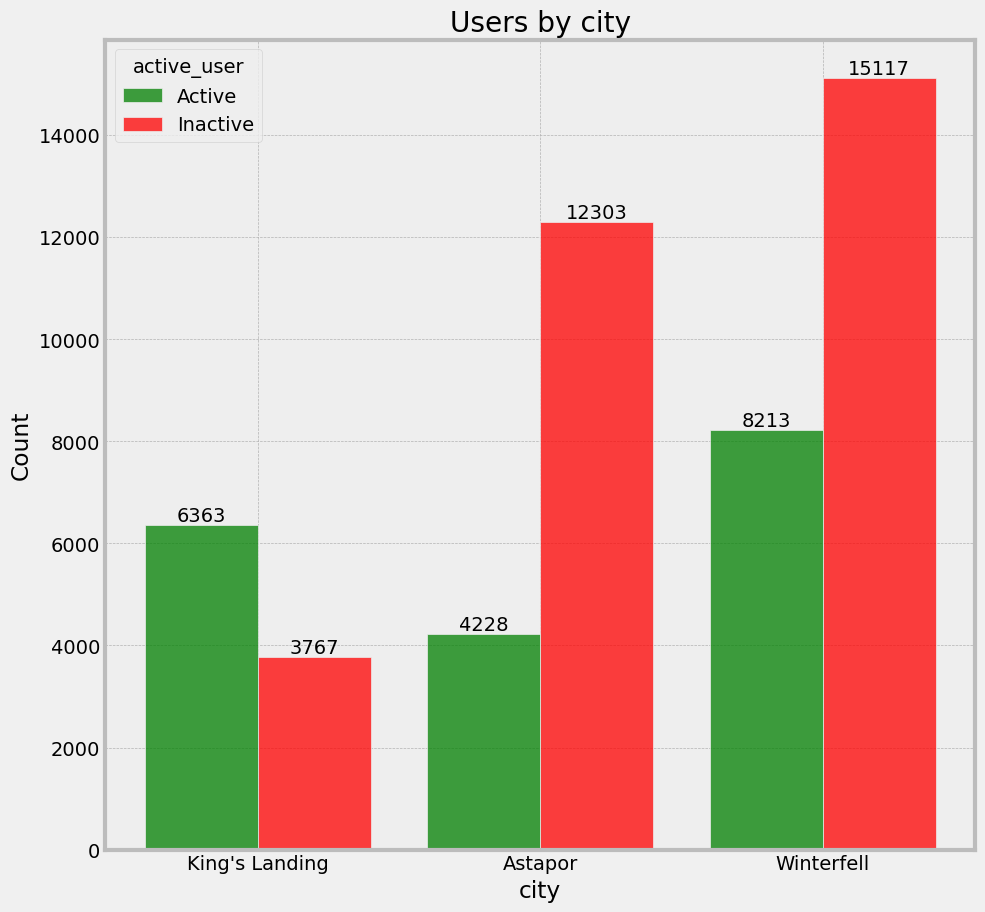

In [470]:

ax = sns.histplot(x = rr.city ,hue = rr['active_user'],multiple = 'dodge', discrete = True, 
                  palette = ['green','red'], shrink = 0.8)
ax.set_title('Users by city')

for i in ax.containers:
        ax.bar_label(i,)

#King's landing seems to retain most users by Astapor and Winterfell have poor retention rates

In [471]:
rr[(rr['city'] == 'Astapor') & (rr['active_user'] == 'Active')].count()

city                      4228
trips_in_first_30_days    4228
signup_date               4228
avg_rating_of_driver      4228
avg_surge                 4228
last_trip_date            4228
phone                     4228
surge_pct                 4228
ultimate_black_user       4228
weekday_pct               4228
avg_dist                  4228
avg_rating_by_driver      4228
active_user               4228
dtype: int64

In [472]:
rr_city = rr.groupby('city')['active_user'].value_counts()

In [473]:
rr_city

city            active_user
Astapor         Inactive       12303
                Active          4228
King's Landing  Active          6363
                Inactive        3767
Winterfell      Inactive       15117
                Active          8213
Name: active_user, dtype: int64

In [474]:
rr_city = pd.DataFrame(rr_city)
rr_city.shape

(6, 1)

In [475]:
inactives = {'Astapor':12306 / (12306 + 4228),
             'Kings Landing' : 3767 / (3767 + 6363),
             'Winterfell' : 15123 / (15123 + 8213)}

inactives = {key : round(inactives[key], 3) for key in inactives}
inactives = pd.DataFrame.from_dict(inactives, orient = 'index', columns = ['inactive_%'])
inactives 

,inactive_%
Astapor,0.744
Kings Landing,0.372
Winterfell,0.648


Text(0.5, 1.0, 'Percentage of users who are inactive by city')

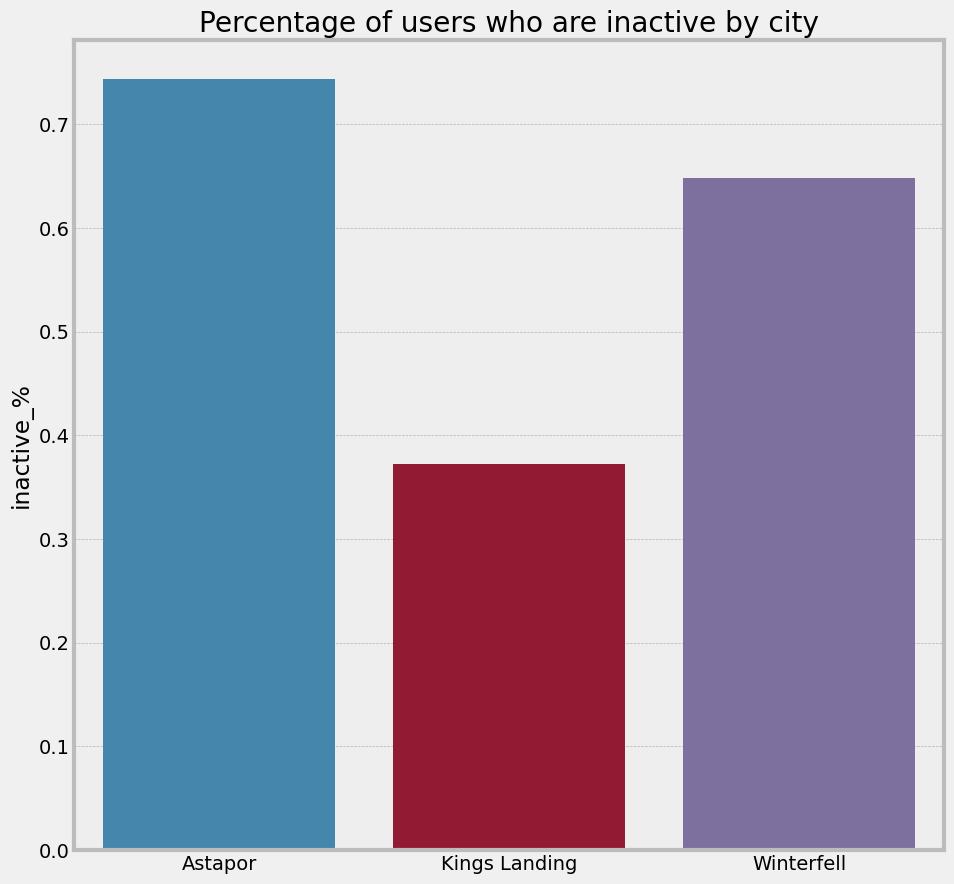

In [476]:
ax = sns.barplot(x = inactives.index, y = inactives['inactive_%'])
ax.set_title('Percentage of users who are inactive by city')

#A closer look at the inactive percentage by city. Astapor and Winterfell have over 60% of users as inactive

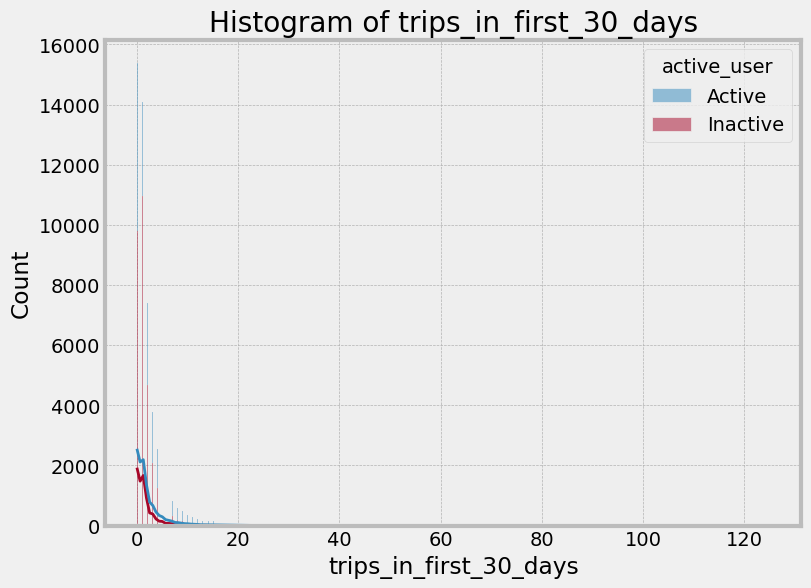

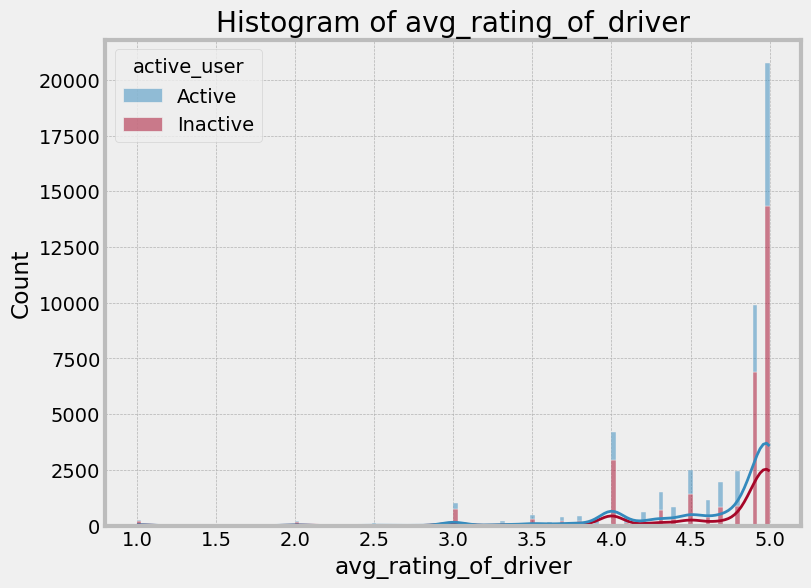

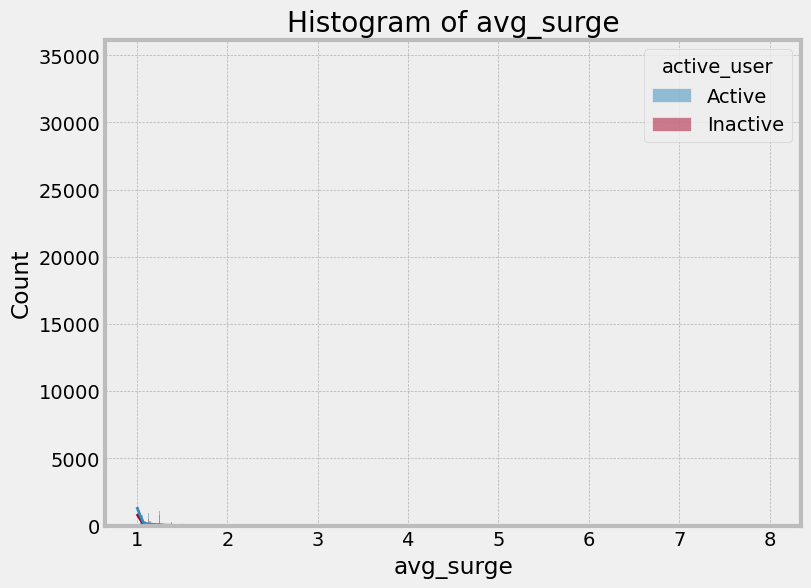

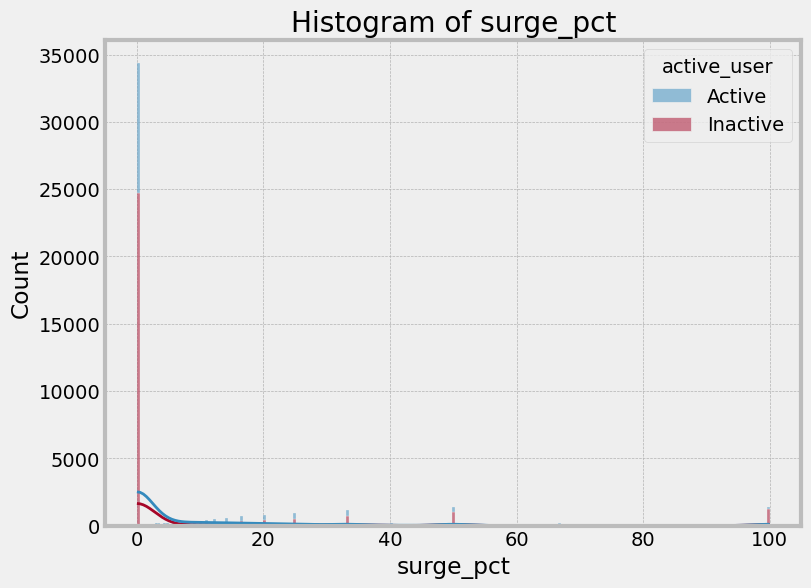

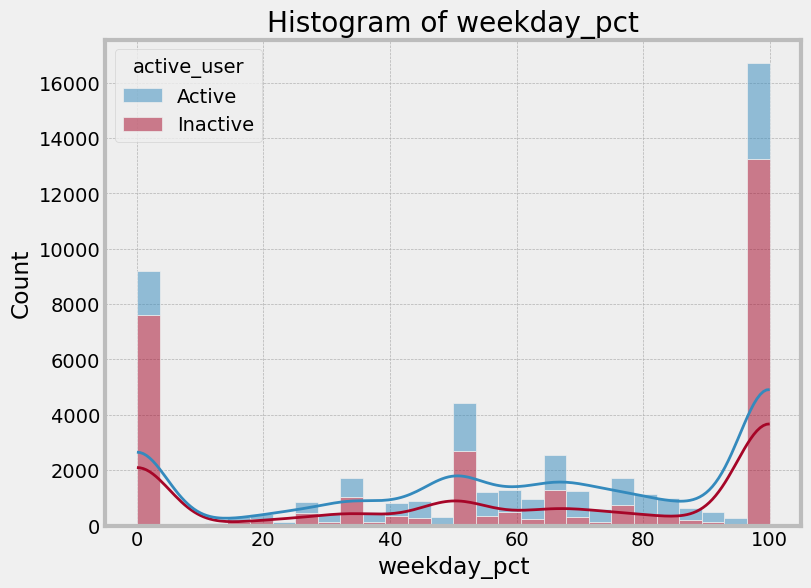

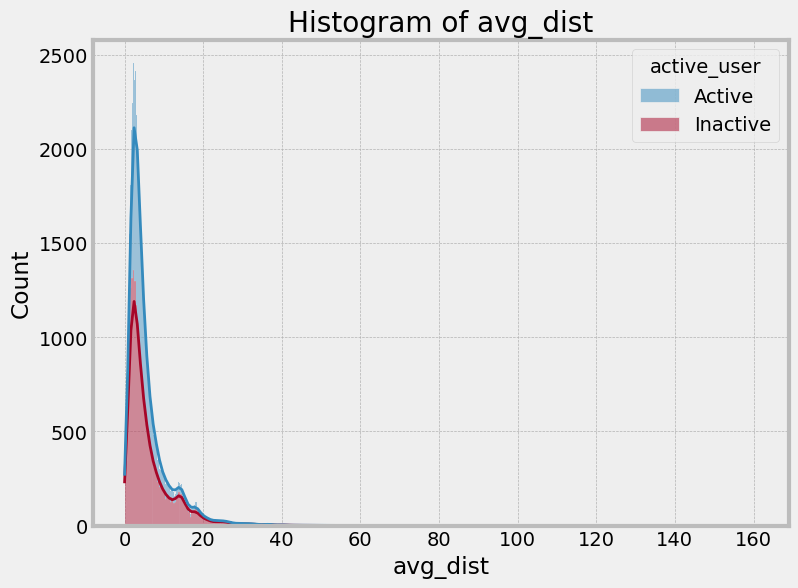

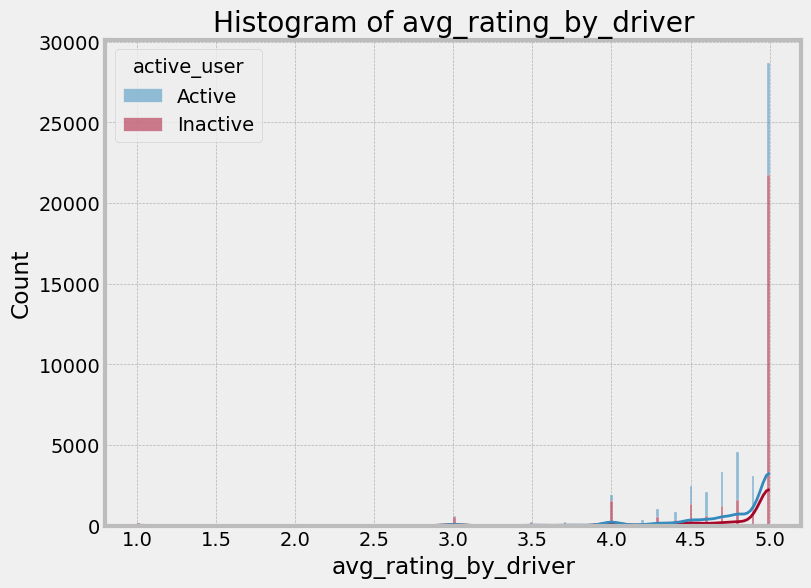

In [477]:
#Create histograms of numeric features separated by active/inactive to see trends 

for feature in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=rr, x=feature, hue='active_user', multiple='stack', kde = True)
    plt.title(f'Histogram of {feature}')
    plt.show()
    
#KDE of these plots do not show noticeable difference in behavior between active vs. inactive users 

In [480]:
rr_no_outlier['active_user'] = rr_no_outlier['last_trip_date'].apply(active_finder)

/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/3635190109.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if start <= date <= end:
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/3635190109.py:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  elif  date < start:
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/1236780979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [481]:
rr_no_outlier.active_user.value_counts()

Inactive    28222
Active      17819
Name: active_user, dtype: int64

In [482]:
active_pct = round((17819 / (17819 + 28222)) * 100,3)
print(f'{active_pct}% of the observed users were retained')

38.702% of the observed users were retained


**Part3.2 Modeling**

In [483]:
rr_cleaned = rr_no_outlier
rr_cleaned

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,Active
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,Inactive
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,Inactive
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,Active
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,King's Landing,1,2014-01-18,1.0,1.00,2014-01-19,iPhone,0.0,False,0.0,7.58,5.0,Inactive
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,Active
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,Inactive
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,Inactive


In [484]:
#Create target variable columns, denoting whether user is Active or Inactive

rr_cleaned['active_user'] = rr_cleaned['last_trip_date'].apply(active_finder)

/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/3635190109.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if start <= date <= end:
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/3635190109.py:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  elif  date < start:
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/2702805320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [485]:
rr_cleaned

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,Active
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,Inactive
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,Inactive
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,Active
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,King's Landing,1,2014-01-18,1.0,1.00,2014-01-19,iPhone,0.0,False,0.0,7.58,5.0,Inactive
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,Active
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,Inactive
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,Inactive


In [486]:
#Use one-hot encoding to change categorical columns (city, phone) into encoded columns (first is dropped to 
# avoid collinearity in linear model)

rr_cleaned = pd.get_dummies(rr_cleaned, columns = ['city','phone'],drop_first =True)
rr_cleaned

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_King's Landing,city_Winterfell,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,Active,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,Inactive,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,Inactive,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,Active,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,Inactive,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,1,2014-01-18,1.0,1.00,2014-01-19,0.0,False,0.0,7.58,5.0,Inactive,1,0,1
49993,3,2014-01-03,4.8,1.11,2014-07-01,11.1,True,55.6,2.53,4.7,Active,0,0,1
49994,1,2014-01-03,4.6,1.44,2014-05-31,37.5,False,25.0,2.25,4.5,Inactive,0,0,1
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,True,100.0,3.86,5.0,Inactive,0,1,0


In [487]:
#Transform date type columns into numerical feature columns

rr_cleaned['signup_year'] = rr_cleaned['signup_date'].dt.year
rr_cleaned['signup_month'] = rr_cleaned['signup_date'].dt.month
rr_cleaned['signup_day'] = rr_cleaned['signup_date'].dt.day


# Because target variable is solely derived from last trip date, ensure last trip date is not part of the model
rr_cleaned.drop(['signup_date','last_trip_date'], axis = 1, inplace = True)


In [488]:
rr_cleaned

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_King's Landing,city_Winterfell,phone_iPhone,signup_year,signup_month,signup_day
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,Active,1,0,1,2014,1,25
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,Inactive,0,0,0,2014,1,29
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,Inactive,0,0,1,2014,1,6
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,Active,1,0,1,2014,1,10
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,Inactive,0,1,0,2014,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,1,1.0,1.00,0.0,False,0.0,7.58,5.0,Inactive,1,0,1,2014,1,18
49993,3,4.8,1.11,11.1,True,55.6,2.53,4.7,Active,0,0,1,2014,1,3
49994,1,4.6,1.44,37.5,False,25.0,2.25,4.5,Inactive,0,0,1,2014,1,3
49997,0,5.0,1.00,0.0,True,100.0,3.86,5.0,Inactive,0,1,0,2014,1,31


In [489]:
rr_cleaned.dtypes

trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
active_user                object
city_King's Landing         uint8
city_Winterfell             uint8
phone_iPhone                uint8
signup_year                 int64
signup_month                int64
signup_day                  int64
dtype: object

In [490]:
int_cols = rr_cleaned.select_dtypes(include = 'uint8')
rr_cleaned[int_cols.columns] = rr_cleaned[int_cols.columns].astype('int64')

In [491]:
rr_cleaned['ultimate_black_user'] = rr_cleaned['ultimate_black_user'].astype(int)

In [492]:
num_cols = [col for col in rr_cleaned.columns if rr_cleaned[col].dtype in ['float64','int64']]
num_cols

['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'ultimate_black_user',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver',
 "city_King's Landing",
 'city_Winterfell',
 'phone_iPhone',
 'signup_year',
 'signup_month',
 'signup_day']

In [493]:
from sklearn.preprocessing import StandardScaler

#Scale numerical columns to standardize for model

scaler = StandardScaler()
rr_cleaned[num_cols] = scaler.fit_transform(rr_cleaned[num_cols])


In [494]:
rr_cleaned

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_King's Landing,city_Winterfell,phone_iPhone,signup_year,signup_month,signup_day
0,0.419109,0.073157,0.112305,0.324326,1.269921,-0.408769,-0.378644,0.638379,Active,1.936092,-0.916727,0.655253,0.0,0.0,0.967841
1,-0.606194,0.612587,-0.342423,-0.451046,-0.787450,-0.305134,0.423860,0.638379,Inactive,-0.516504,-0.916727,-1.526128,0.0,0.0,1.425394
2,0.162783,-0.646084,-0.342423,-0.451046,-0.787450,1.058479,-0.885672,0.638379,Inactive,-0.516504,-0.916727,0.655253,0.0,0.0,-1.205539
3,1.700739,-0.106653,0.294195,0.555931,1.269921,0.513034,-0.607681,0.102779,Active,1.936092,-0.916727,0.655253,0.0,0.0,-0.747986
4,2.982369,-0.466274,0.521559,0.143070,-0.787450,0.578487,-0.473056,0.102779,Inactive,-0.516504,1.090837,-1.526128,0.0,0.0,1.196618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,-0.349868,-6.579814,-0.342423,-0.451046,-0.787450,-1.668748,0.304971,0.638379,Inactive,1.936092,-0.916727,0.655253,0.0,0.0,0.167122
49993,0.162783,0.252967,0.157777,0.107826,1.269921,-0.152409,-0.577958,-0.968422,Active,-0.516504,-0.916727,0.655253,0.0,0.0,-1.548705
49994,-0.349868,-0.106653,1.658377,1.437036,-0.787450,-0.986941,-0.626913,-2.039623,Inactive,-0.516504,-0.916727,0.655253,0.0,0.0,-1.548705
49997,-0.606194,0.612587,-0.342423,-0.451046,1.269921,1.058479,-0.345425,0.638379,Inactive,-0.516504,1.090837,-1.526128,0.0,0.0,1.654171


In [495]:
rr_cleaned.active_user.value_counts()

#Classes are relatively balanced, can train model without additional sampling

Inactive    28222
Active      17819
Name: active_user, dtype: int64

In [496]:
from sklearn.model_selection import train_test_split 

#Define feature and tareget variables

X = rr_cleaned.drop('active_user',axis = 1)
y = rr_cleaned['active_user']

#Create train, test split from data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [497]:
#Create dictionary to store model scores
model_eval = {}

In [498]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score



#Will first try a logistic regression model
#Create the model,fit to training data and evaluate score

lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)


acc_score = accuracy_score(y_test,y_pred)
cv_scores = cross_val_score(lr_model, X, y, cv=5)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean()}')


#Add scores to model dictionary
model_eval['Logistic regression'] = [acc_score]


print (f"Logistic Regression accuracy_score = {acc_score}")

Cross-Validation Scores: [0.73895103 0.72990877 0.72806255 0.72817116 0.73783666]
Average Cross-Validation Score: 0.732586034947303
Logistic Regression accuracy_score = 0.7339559126941035


In [499]:
feature_importance = pd.Series(lr_model.coef_[0], index=X_train.columns).sort_values(ascending=False)
print(feature_importance)

avg_rating_by_driver      0.506838
avg_dist                  0.179761
signup_day                0.046048
avg_rating_of_driver      0.041316
avg_surge                 0.030698
weekday_pct               0.000040
signup_year               0.000000
signup_month              0.000000
surge_pct                -0.080530
city_Winterfell          -0.222524
trips_in_first_30_days   -0.298438
ultimate_black_user      -0.399827
phone_iPhone             -0.487713
city_King's Landing      -0.735494
dtype: float64


In [500]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)


acc_score = accuracy_score(y_test,y_pred)
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean()}')


#Add scores to model dictionary
model_eval['Random Forest'] = [acc_score]


print (f"Random Forest accuracy_score = {acc_score}")

Cross-Validation Scores: [0.76946465 0.76715899 0.76629018 0.76683319 0.76965682]
Average Cross-Validation Score: 0.7678807674923079
Random Forest accuracy_score = 0.7752198935823651


I experimented with a logistic regression model and a random forest model. The random forest model performed slightly better with an accuracy score of 0.77 compared to 0.73 for the logisitc regression model. The random forest model has the benefits of being able to use different data inputs and adjust to additional feature engineering that could be done in the future. Also, because the dataset is not extremely large, more complex models can be used without too much sacrific in performance. 

14


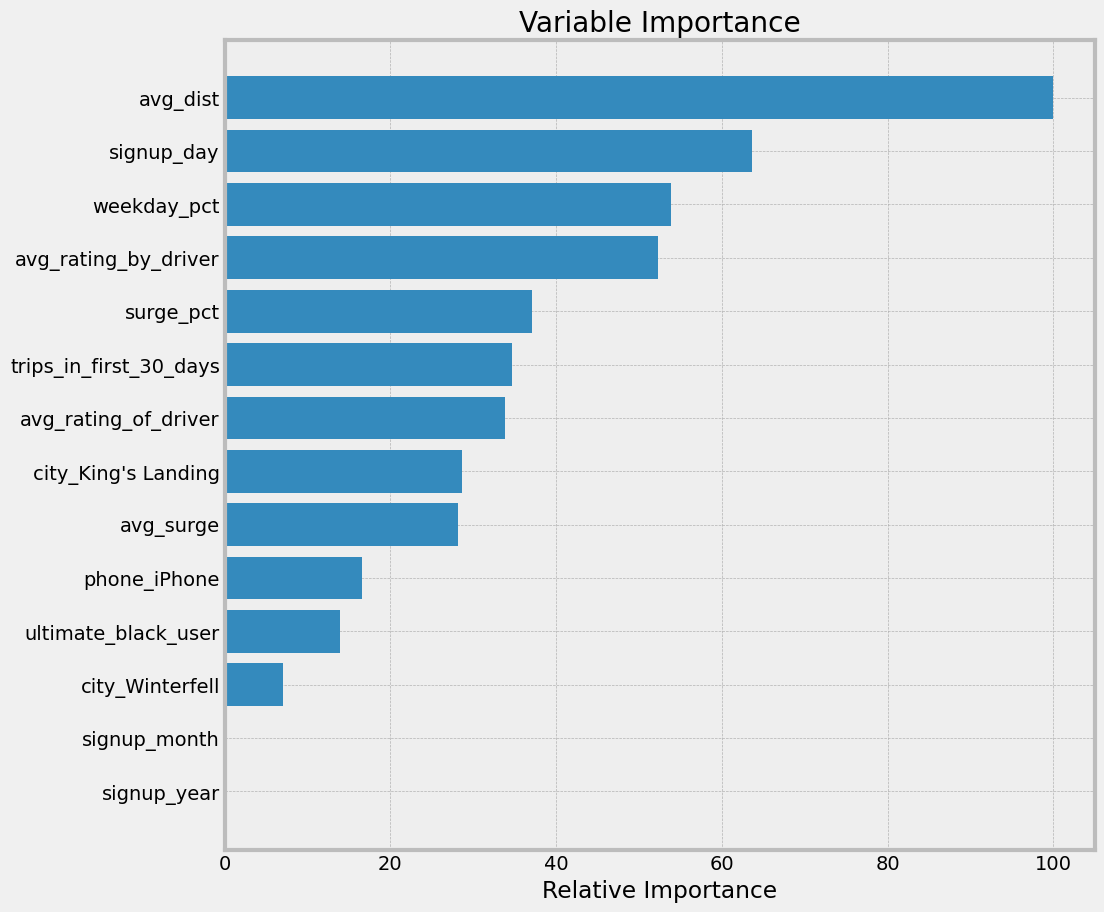

In [501]:
#Create plot of feature importance for random forest model

feature_importance = rf_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Relative importance shows average distance as the most important factor

In [502]:
rr = rr_no_outlier

rr['signup_year'] = rr['signup_date'].dt.year
rr['signup_month'] = rr['signup_date'].dt.month
rr['signup_day'] = rr['signup_date'].dt.day

/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/2852585075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['signup_year'] = rr['signup_date'].dt.year
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/2852585075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['signup_month'] = rr['signup_date'].dt.month
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_69565/2852585075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

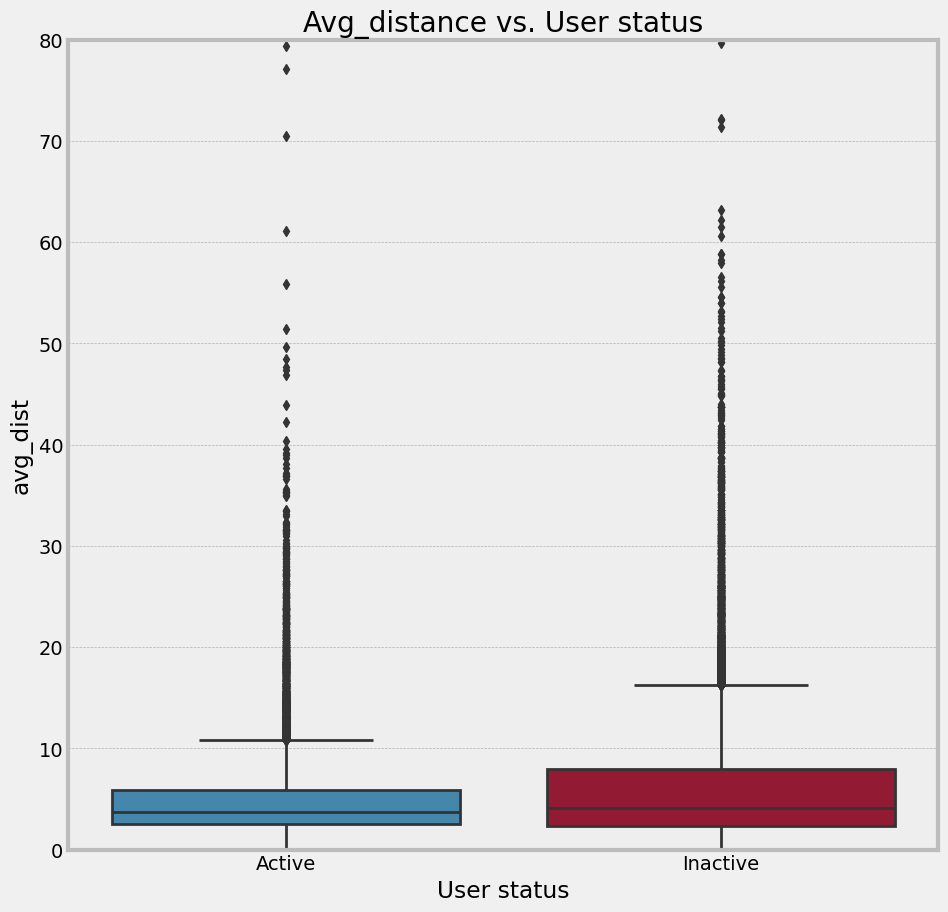

In [503]:
plt.figure(figsize=(10,10))
sns.boxplot(data = rr,y = 'avg_dist', x = 'active_user')
#plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('User status')
plt.title('Avg_distance vs. User status')
plt.ylim(0,80)
plt.show()

Shows inactive users on average took longer rides

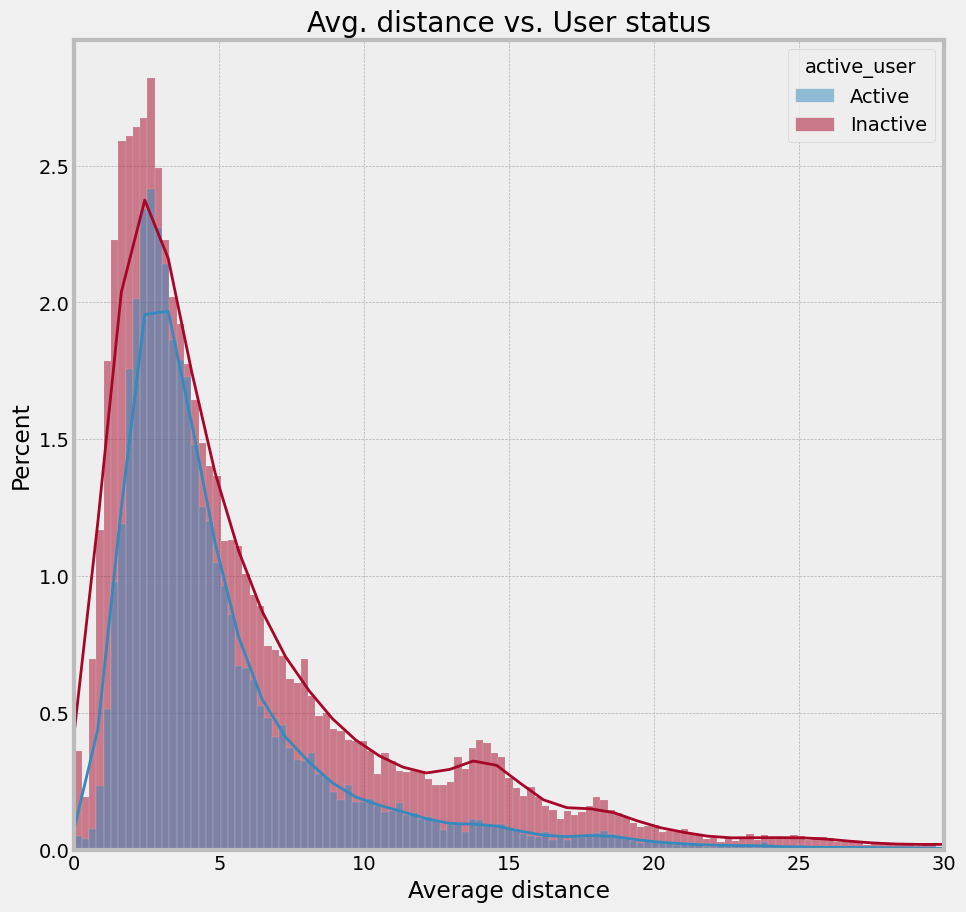

In [504]:
plt.figure(figsize=(10,10))
sns.histplot(data = rr,x= 'avg_dist', hue= 'active_user', kde = True, stat = 'percent')

plt.xlabel('Average distance')
plt.title('Avg. distance vs. User status')
plt.xlim(0, 30)
plt.show()

Inactive users appear to have longer average distance with a notable peak at about 13 - 17 miles. 

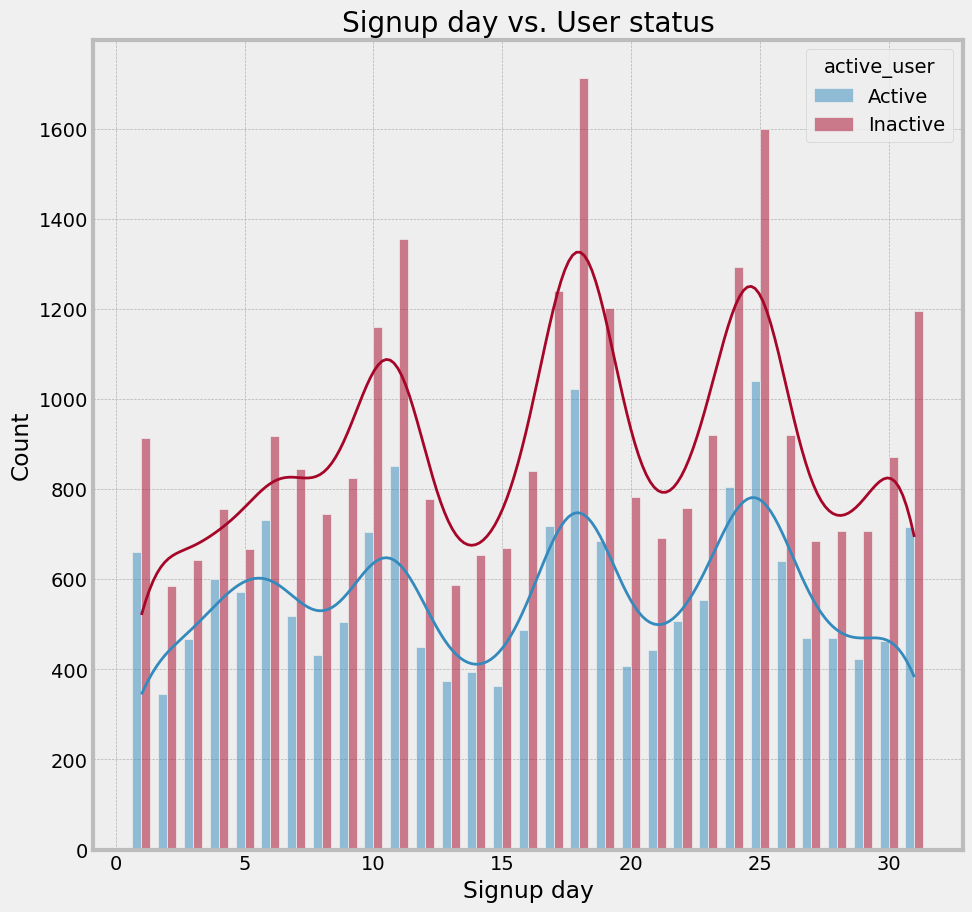

In [505]:
plt.figure(figsize=(10,10))
sns.histplot(data = rr,x = 'signup_day', hue= 'active_user',multiple = 'dodge',kde = True, discrete = True,
            shrink = 0.7)

plt.xlabel('Signup day')
plt.title('Signup day vs. User status')
plt.show()

Signup day is significant in feature importance but hard to see why in this graph. Perahps need more specific
domain knowledge to see how signup day could be relevant to retention. 

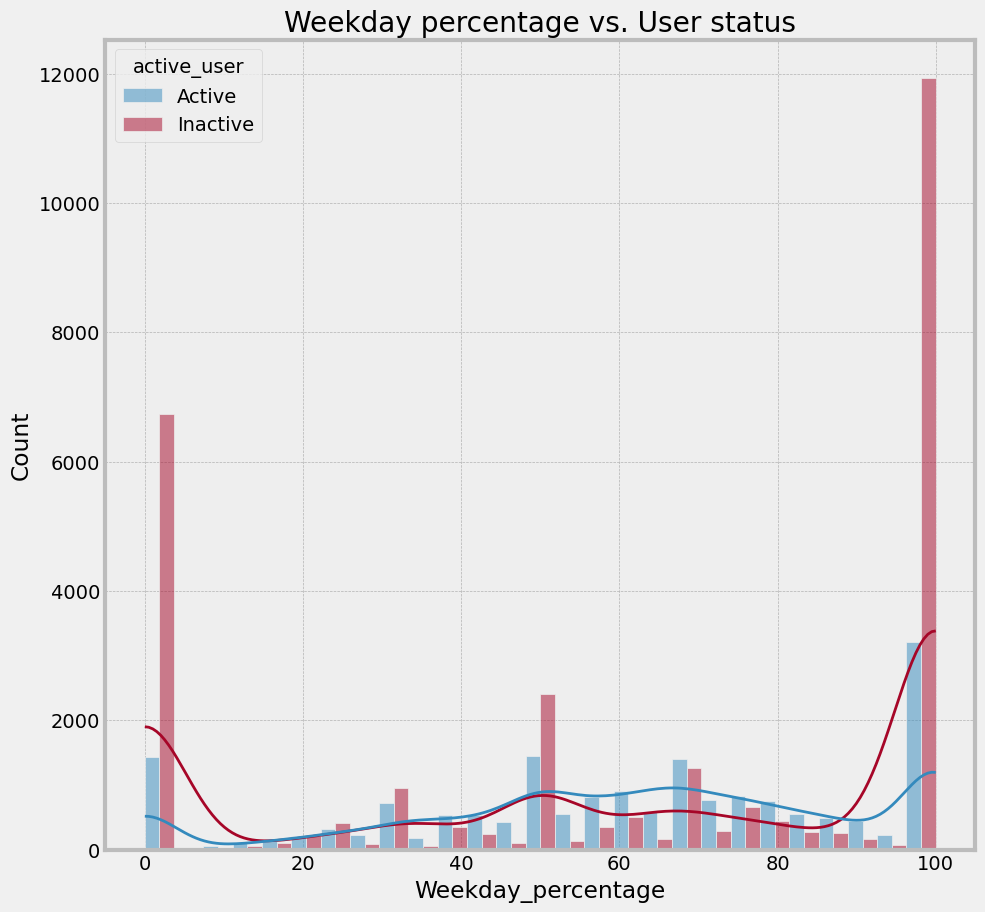

In [506]:
plt.figure(figsize=(10,10))
sns.histplot(data = rr,x= 'weekday_pct', hue= 'active_user', kde = True, 
             multiple ='dodge', common_norm = False)

plt.xlabel('Weekday_percentage')
plt.title('Weekday percentage vs. User status')
plt.show()

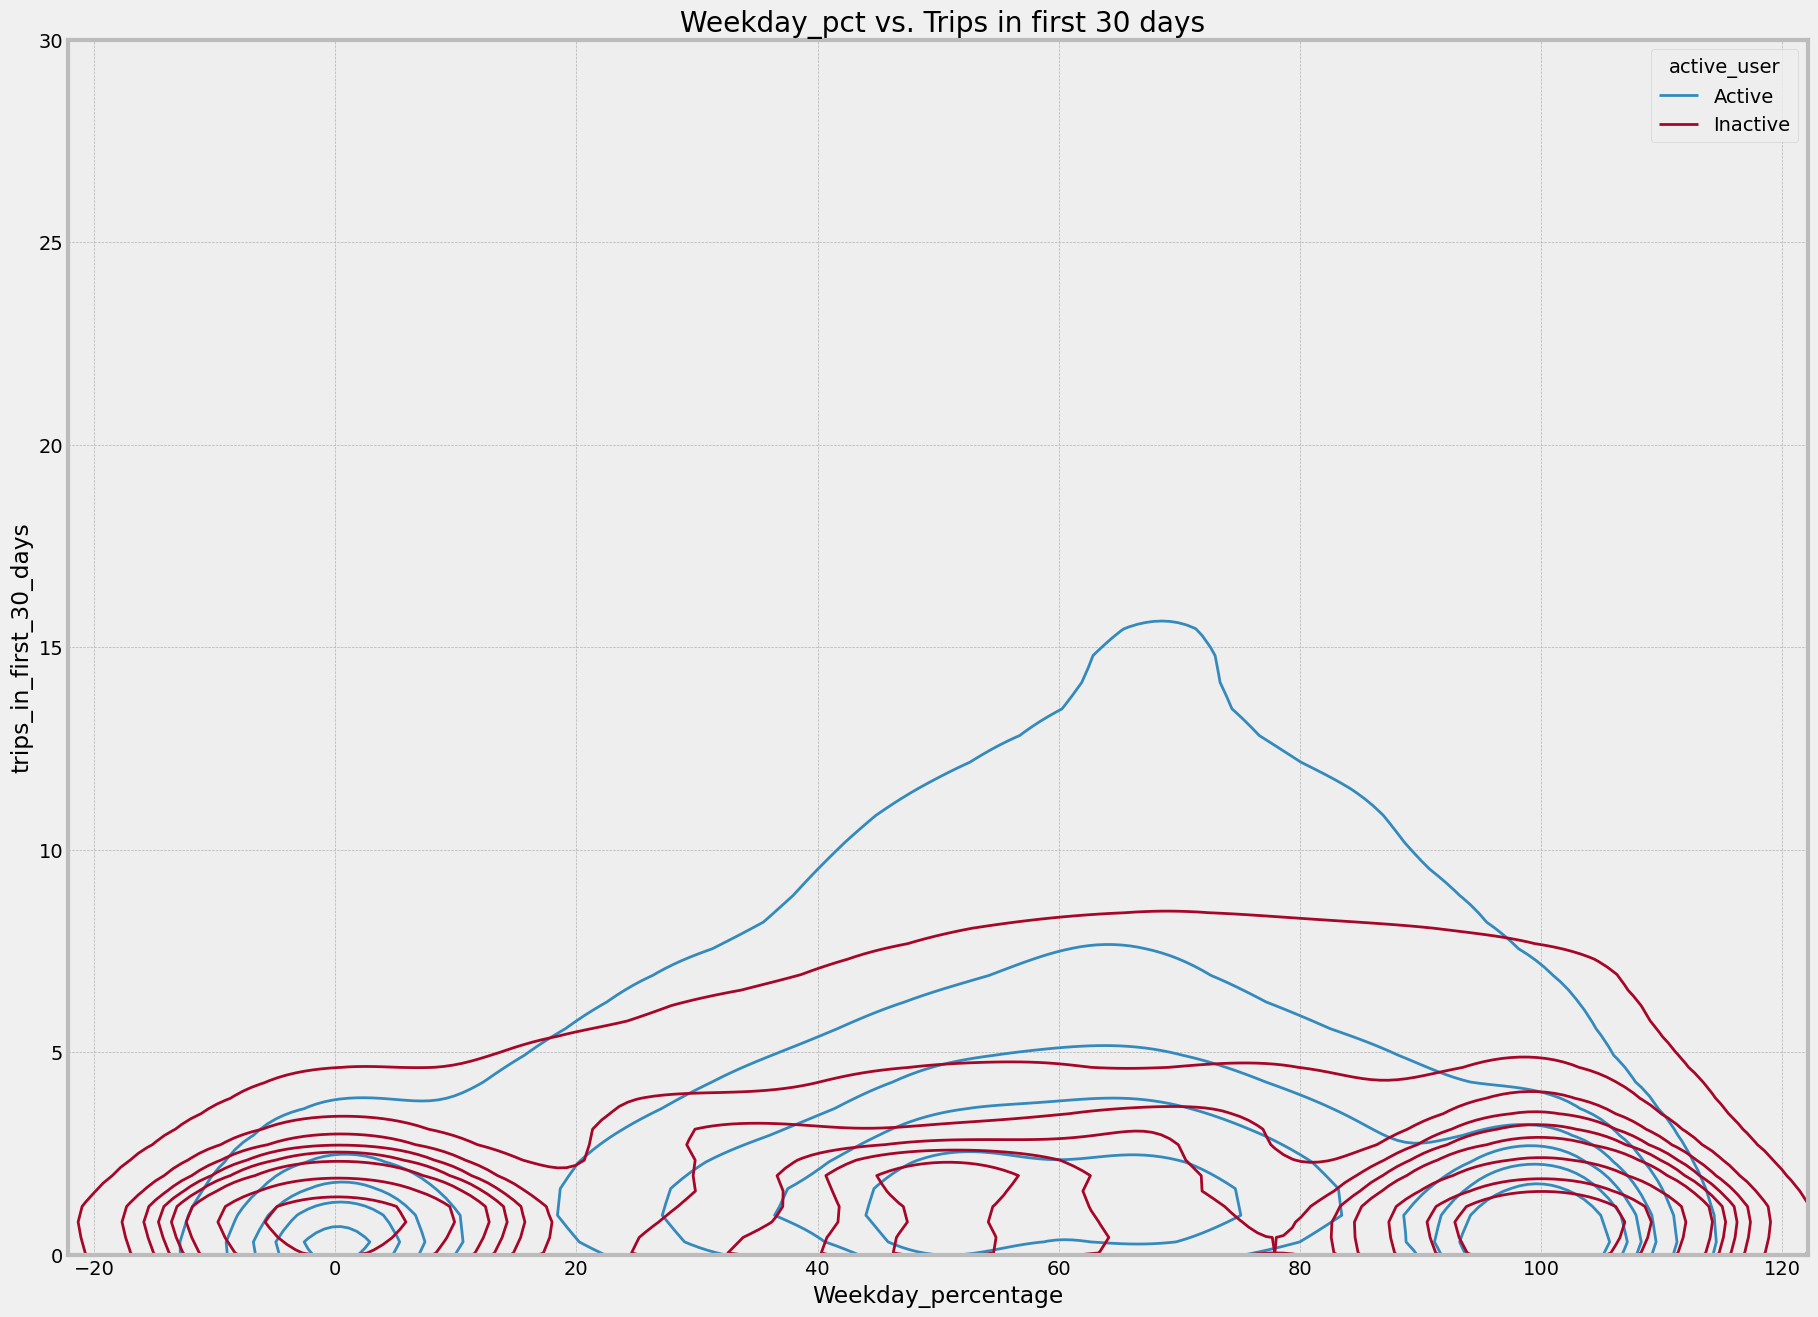

In [507]:
plt.figure(figsize=(20,15))
sns.kdeplot(data = rr,x= 'weekday_pct',y = 'trips_in_first_30_days', hue= 'active_user'
              )

plt.xlabel('Weekday_percentage')
plt.title(' Weekday_pct vs. Trips in first 30 days')
plt.ylim(0,30)
plt.show()

**3.3**

The model indicates that factors such as average distance, signup day and weekday percentage are some of the most important factors in rider retention. Ultimate needs to look closer at these metrics. For example, there seems to be a trend where riders who mostly were weekday riders tend to become inactive. Maybe there is a noticeable difference in the experience (wait times, driver quality etc.) between weekdays and weekends. Also, earlier analysis showed a majority of Android users were inactive, indicating an inferior experience for Android users. Also, rider retention is noticeably lower in Winterfell and Astapor. Ultimate could look closer into those areas and see what King's Landing is doing so much better than the other locations to retain much higher rate of riders. 